In [1]:
%load_ext autoreload
%autoreload 2
from MODM_Tool_Modules.TOPSIS_Modules import sensitivity_analysis_TOPSIS as sens
from MODM_Tool_Modules import gathering_data_function as gt
from MODM_Tool_Modules.TOPSIS_Modules import TOPSIS_main_data_processing as tp_process
from MODM_Tool_Modules.TOPSIS_Modules import TOPSIS_plotting_results_function as tp_plot
from MODM_Tool_Modules.TOPSIS_Modules import TOPSIS_saving_results_function as tp_save

The following code snippet run a function that gathers all the necessary data to run the simulation.

1. Loads the Excel or CSV file into a dataframe.
2. User defines the beneficial or non-beneficial nature of all criteria.
3. User assigns a weight (1-10) for each criterion.
4. Normalizes the weights.

Argument:
    file_path (str) : path of the Excel or CSV file.

Returns:
    decision_matrix (dataframe) : data array containing all the alternatives and their evaluations for each criterion.
    data_filename (str) : name of the file.
    weights (dict) : 

In [2]:
decision_matrix, normalized_matrix, data_filename, weights, normalized_weights, beneficial_criteria, non_beneficial_criteria = gt.gathering_data(
    'C:/Users/Virgi/OneDrive/Bureau/MODM_tool_project/Tool/Data/data_input/optimal_pareto_points2.csv')

       Profit (€/h)  Impact on Ecosystems (species·yr/h) · 10^4  \
Point                                                             
1            566.37                                       5.532   
2           2701.83                                       5.576   
3           4223.16                                       5.625   
4           5381.57                                       5.674   
5           6091.79                                       5.720   
6           6221.99                                       5.766   
7           6271.55                                       5.814   
8           6272.59                                       5.862   
9           6273.62                                       5.910   
10          6274.65                                       5.958   
11          5843.28                                       5.890   
12          5324.84                                       5.853   
13          4575.07                                       5.81

The following code snippet asks the user if he wants to save the results of the run and creates a new directory in the folder 'results' is the answer is 'yes'.

In [3]:
user_input = input(
    "Do you want to save the results of this run? (yes/no): ").strip().lower()
directory = None
if user_input == 'yes':
    directory = tp_save.directory_creation(data_filename)

The following code snippet processes the main calculations of the TOPSIS method.

In [4]:
ranked_alternatives, ranks, weighted_normalized_matrix, S, ideal_best, ideal_worst = tp_process.TOPSIS_main_data_processing(
    normalized_weights, normalized_matrix)

The following code snippet plots the results of the run

c:\Users\Virgi\OneDrive\Bureau\MODM_tool_project\Tool\Scripts\MODM_Tool_Modules\TOPSIS_Modules\TOPSIS_plotting_results_function.py:56: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




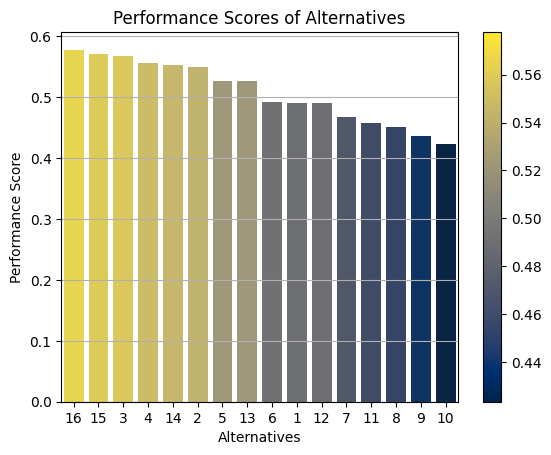


Ranked Alternatives:
Point
16    0.577688
15    0.569866
3     0.567998
4     0.556656
14    0.553098
2     0.549507
5     0.525997
13    0.525575
6     0.492050
1     0.490211
12    0.490000
7     0.468021
11    0.457228
8     0.451152
9     0.436457
10    0.423583
dtype: float64


In [5]:
tp_plot.results_visualization_topsis(
    ranked_alternatives,
    weighted_normalized_matrix,
    beneficial_criteria,
    weights,
    normalized_weights,
    S,
    user_input,
    directory,
    decision_matrix,
    ideal_best,
    ideal_worst)

Initial weight for Profit (€/h): 5
Initial weight for Impact on Ecosystems (species·yr/h) · 10^4: 5
Initial weight for Impact on Resources (USD2013/h) · 10^-4: 5


100%|██████████| 1000/1000 [00:02<00:00, 492.33it/s]


16
43.4


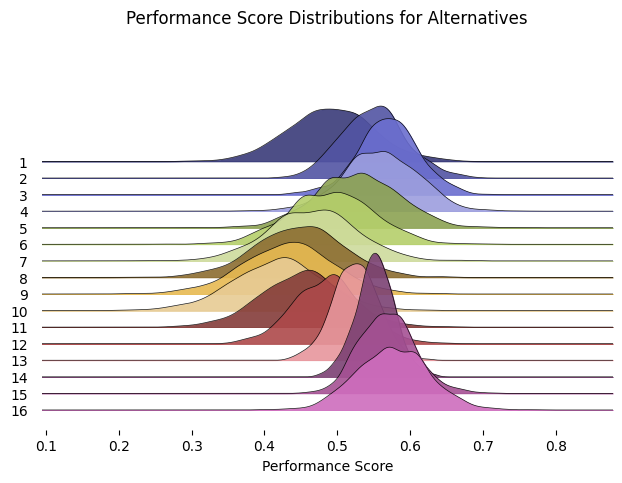

In [6]:
user_input2 = input(
    "Do you want to run a sensitivity analysis? (yes/no): ").strip().lower()
if user_input2 == 'yes':
    uncertainties, scores_df, ranks_df, reliability_percentage, initial_best_solution = sens.sensitivity_analysis(
        tp_process.TOPSIS_main_data_processing, weights, 100000, 0, 10, decision_matrix, normalized_matrix, S, user_input, directory)

The following code snippet saves the results

In [7]:
if user_input == 'yes':
    tp_save.save_run_results(
        directory,
        decision_matrix,
        weighted_normalized_matrix,
        ranked_alternatives,
        weights,
        beneficial_criteria,
        non_beneficial_criteria,
    )
    
if user_input2 == 'yes' and user_input == 'yes':
    tp_save.save_sensitivity_results(
        directory,
        uncertainties,
        scores_df,
        ranks_df,
        reliability_percentage,
        initial_best_solution)